In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns
from sklearn.metrics import precision_score as ps
from sklearn.metrics import recall_score as rs
from sklearn.metrics import f1_score as f1s
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score

In [12]:
from tqdm import tqdm
import IPython
import wave
from sklearn.cluster import KMeans
import os
import PIL
from PIL import Image
from numpy import asarray
import cv2
from sklearn.decomposition import PCA
import tensorflow as tf

In [8]:
print(tf.__version__)

2.15.0


In [10]:
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from keras import Input
from keras.models import Sequential,Model
from sklearn.metrics import *
from matplotlib import pyplot
from tensorflow.keras.optimizers import Adam
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
!pip install tensorflow-datasets

  Obtaining dependency information for tensorflow-datasets from https://files.pythonhosted.org/packages/8f/50/52fa3d41d20c687d81f66338bc1b0e71a27a3390ecfa8f5bc212a10135e1/tensorflow_datasets-4.9.6-py3-none-any.whl.metadata
  Obtaining dependency information for click from https://files.pythonhosted.org/packages/00/2e/d53fa4befbf2cfa713304affc7ca780ce4fc1fd8710527771b58311a3229/click-8.1.7-py3-none-any.whl.metadata
  Obtaining dependency information for dm-tree from https://files.pythonhosted.org/packages/e4/c1/522041457444b67125ac9527208bb3148f63d7dce0a86ffa589ec763a10e/dm_tree-0.1.8-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for immutabledict from https://files.pythonhosted.org/packages/e2/13/3cf4ac5b3403f3456e645c4533883ef67b1bb0c72e56b79c707715f57a74/immutabledict-4.2.0-py3-none-any.whl.metadata
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for pyarrow from https://f

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\biswa\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\google\\~upb\\_message.pyd'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import tensorflow_datasets as tfds

In [18]:
base_covid_path='/Users/biswa/Downloads/COVID-19 Dataset/X-ray/COVID'
base_no_covid_path='/Users/biswa/Downloads/COVID-19 Dataset/X-ray/Non-COVID'

In [21]:
image_count = len(list(os.listdir(base_covid_path)))
print(image_count)

image_count = len(list(os.listdir(base_no_covid_path)))
print(image_count)

4044
5500


In [57]:
covid=list(os.listdir(base_covid_path))

In [64]:
print(covid[0])
print(base_covid_path+'/'+covid[0])

000001-12.jpg
/Users/biswa/Downloads/COVID-19 Dataset/X-ray/COVID/000001-12.jpg


(1474, 1692)


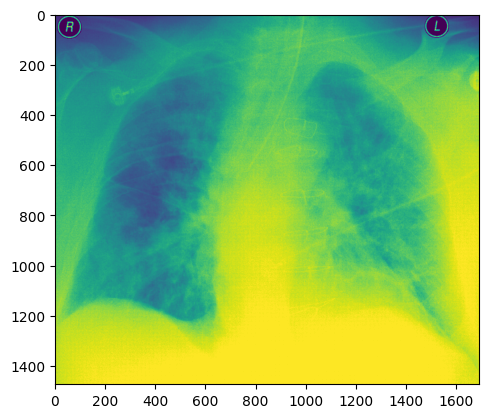

In [69]:
img = PIL.Image.open(base_covid_path+'/'+covid[100])
numpydata = asarray(img)
print(numpydata.shape)
plt.imshow(numpydata)

In [26]:
batch_size = 32
img_height = 224
img_width = 224

In [27]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  base_covid_path[:-6],
  validation_split=0.2,
  subset="training",
  color_mode='grayscale',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9537 files belonging to 2 classes.
Using 7630 files for training.


In [28]:
train_ds_normal = tf.keras.utils.image_dataset_from_directory(
  base_covid_path[:-6],
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9537 files belonging to 2 classes.
Using 7630 files for training.


In [29]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  base_covid_path[:-6],
  validation_split=0.2,
  subset="validation",
  color_mode='grayscale',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9537 files belonging to 2 classes.
Using 1907 files for validation.


In [30]:
val_ds_normal = tf.keras.utils.image_dataset_from_directory(
  base_covid_path[:-6],
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9537 files belonging to 2 classes.
Using 1907 files for validation.


In [31]:
class_names = train_ds.class_names
print(class_names)

['COVID', 'Non-COVID']


# Data Visualisation

Text(0.5, 1.0, 'Count of Image')

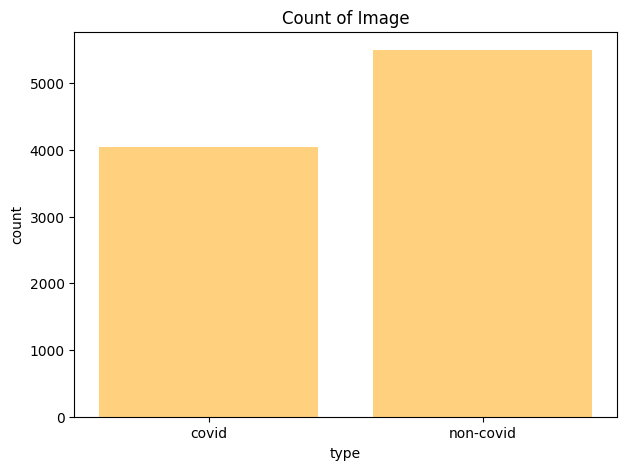

In [70]:
plt.figure(figsize=(7,5))
plt.bar(['covid','non-covid'],[4044,5500],color='orange',alpha=0.5)
plt.xlabel('type')
plt.ylabel('count')
plt.title('Count of Image')

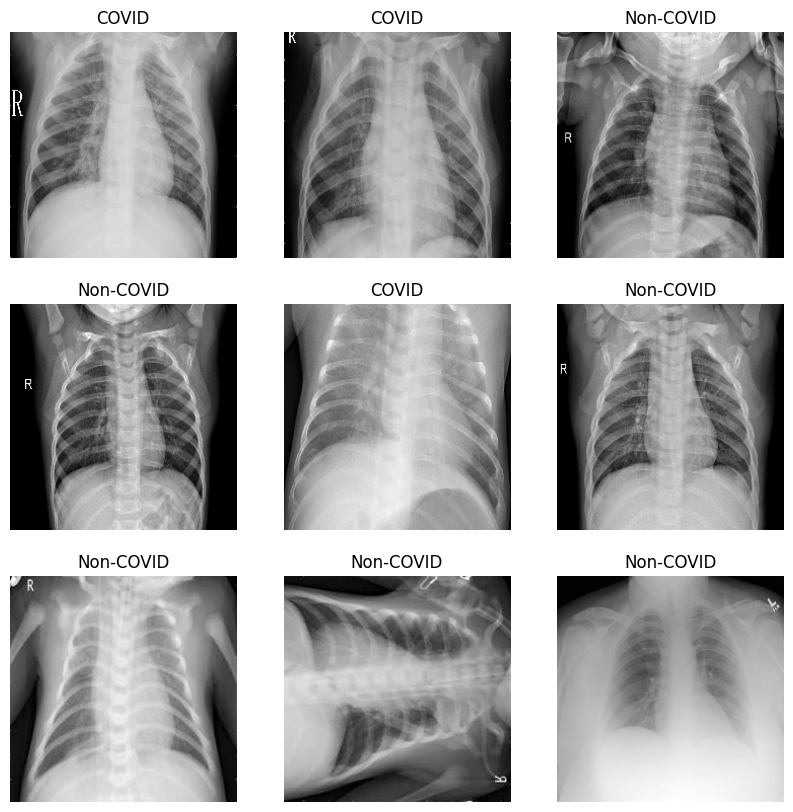

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().flatten().reshape(224,224).astype("uint8"),cmap='gray')
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Supervised and Unsupervised Learning Models

## Dimensionality reduction using PCA

In [34]:
dic={}

In [72]:
c=0
lst=list(os.listdir(base_covid_path))
for i in tqdm(range(len(list(os.listdir(base_covid_path))))):
  dic[c]=base_covid_path+'/'+lst[i]
  c+=1

100%|██████████████████████████████████████████████████████████████████████████████████████| 4044/4044 [00:00<?, ?it/s]


In [36]:
dic_no_covid={}

In [71]:
c=0
lst=list(os.listdir(base_no_covid_path))
for i in tqdm(range(len(list(os.listdir(base_no_covid_path))))):
  dic_no_covid[c]=base_no_covid_path+'/'+lst[i]
  c+=1

100%|██████████████████████████████████████████████████████████████████████████| 5500/5500 [00:00<00:00, 995884.65it/s]


##         Selecting Number of Principle Components

In [45]:
import os
directory_path = r"/Users/biswa/Downloads/COVID-19 Dataset/X-ray"
print(os.listdir(directory_path))


['COVID', 'Non-COVID']


In [73]:
img_path = dic_no_covid[8]
print(img_path)


/Users/biswa/Downloads/COVID-19 Dataset/X-ray/Non-COVID/00001315_006.png


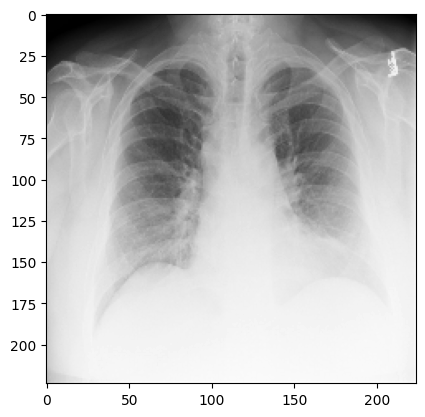

In [75]:
img = cv2.imread(dic_no_covid[10])
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
plt.imshow(img, cmap='gray')
# plt.show()

In [76]:
pca = PCA(n_components=20)
pca.fit(img)
trans_img = pca.transform(img)

In [77]:
trans_img.flatten().shape

(4480,)

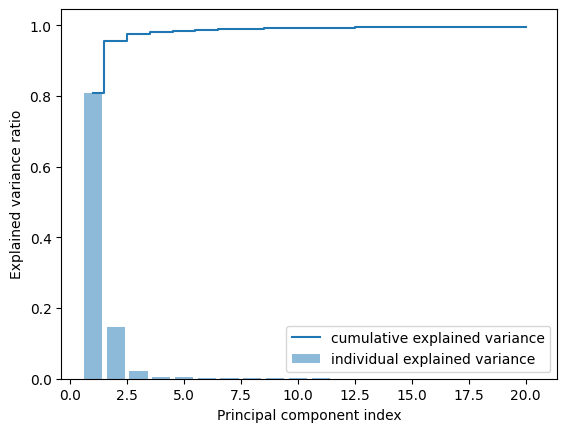

[0.80898285 0.9551012  0.97567021 0.9813729  0.98494176 0.98742193
 0.98938937 0.99053429 0.99153894 0.9924369  0.99310875 0.99367945
 0.9941802  0.99461016 0.99497201 0.99530133 0.99558928 0.99585336
 0.99609424 0.99631331]


In [79]:
var=(pca.explained_variance_ratio_)
cum_var_exp = np.cumsum(var)

# plot explained variances
plt.bar(range(1,len(var)+1), var, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1,len(var)+1), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

print(cum_var_exp)

In [80]:
rows = 1
columns = 2
img_transformed = pca.inverse_transform(trans_img)

Text(0.5, 1.0, 'Blurred Image after applying PCA')

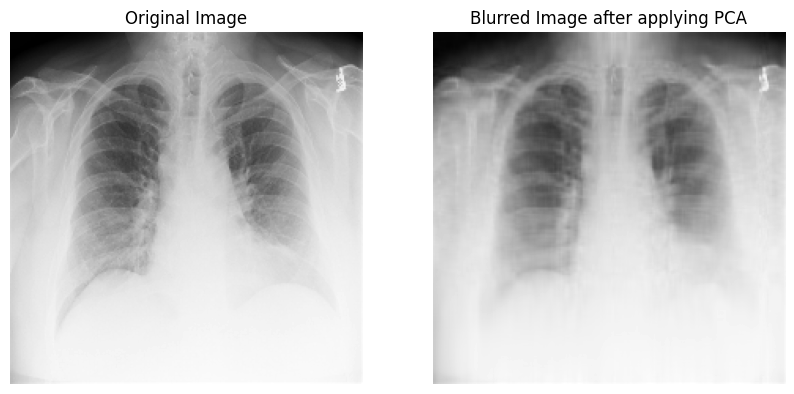

In [81]:
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(rows, columns, 1)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title("Original Image")

fig.add_subplot(rows, columns, 2)
plt.imshow(img_transformed,cmap='gray')
plt.axis('off')
plt.title("Blurred Image after applying PCA")

In [82]:
dic_keys=list(dic.keys())
array_covid=np.zeros((1,4481))
for i in tqdm(range(len(dic_keys))):
  img = cv2.imread(dic[i]) #you can use any image you want.
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, dsize=(224,224), interpolation=cv2.INTER_CUBIC)
  pca = PCA(n_components=20)
  pca.fit(img)
  trans_img = pca.transform(img)
  array_covid=np.append(array_covid,np.concatenate((trans_img.flatten(),np.array([1])),axis=0).reshape(1,4481),axis=0)

100%|██████████████████████████████████████████████████████████████████████████████| 4044/4044 [34:21<00:00,  1.96it/s]


In [83]:
array_covid.shape

(4045, 4481)

In [84]:
dic_no_covid_keys=list(dic_no_covid.keys())
array_no_covid=np.zeros((1,4481))
for i in tqdm(range(len(dic_no_covid_keys))):
  img = cv2.imread(dic_no_covid[i]) #you can use any image you want.
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, dsize=(224,224), interpolation=cv2.INTER_CUBIC)
  pca = PCA(n_components=20)
  pca.fit(img)
  trans_img = pca.transform(img)
  array_no_covid=np.append(array_no_covid,np.concatenate((trans_img.flatten(),np.array([0])),axis=0).reshape(1,4481),axis=0)

100%|██████████████████████████████████████████████████████████████████████████████| 5500/5500 [19:42<00:00,  4.65it/s]


In [85]:
array_no_covid.shape

(5501, 4481)

In [86]:
data_array=np.concatenate((array_covid,array_no_covid),axis=0)
data_array.shape

(9546, 4481)

In [87]:
data_array

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.26953677e+02,  4.11903082e+01, -9.79335116e+01, ...,
        -1.33616101e+01, -2.06639675e+01,  1.00000000e+00],
       [-1.86625110e+02,  3.36636537e+02,  2.32718204e+02, ...,
         4.85787658e+01,  4.57304352e+01,  1.00000000e+00],
       ...,
       [-1.08973589e+03,  7.65159952e+02,  4.96964917e+02, ...,
         1.72818504e+01, -1.25996053e+01,  0.00000000e+00],
       [-6.78719677e+02, -2.15273055e+02,  4.02955085e+02, ...,
        -1.71221753e+00,  4.81267577e+00,  0.00000000e+00],
       [-8.74855185e+02,  4.06458934e+02,  2.81988489e+02, ...,
        -5.04061068e+01,  9.89027477e+00,  0.00000000e+00]])

## Train Test Split 

In [88]:
X=data_array.T[:-1].T
Y=data_array.T[-1].T

In [89]:
X[0].shape

(4480,)

In [90]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(X,Y,train_size=0.7)

In [91]:
x_train

array([[ 7.56743079e+02,  2.60647340e+02,  3.31566934e+02, ...,
        -1.14591640e+00, -7.21562902e+00, -1.10479277e+01],
       [ 1.34576804e+03, -3.39729464e+02, -2.56849809e+02, ...,
         3.51005200e+01, -8.88067480e-01, -2.25120597e+01],
       [-1.24242948e+02,  1.26861525e+02, -2.42650605e+02, ...,
        -2.53914420e+01,  8.92699383e+01, -5.76838224e+01],
       ...,
       [-2.97864537e+02,  2.69479657e+01,  3.45201732e+02, ...,
        -3.43942416e+01, -3.05021405e+01,  3.58633637e+01],
       [ 2.58640698e+02,  1.37936987e+02, -8.41922812e+01, ...,
        -5.05918558e+00,  8.12841732e+00, -6.05466636e-02],
       [-4.70435087e+02, -3.25485650e+02,  2.84179341e+02, ...,
        -1.61952069e+01, -1.42655152e+01, -6.91788321e+01]])

In [92]:
y_train

array([0., 0., 0., ..., 1., 1., 0.])

In [93]:
x_test

array([[-3.53882379e+02,  9.55835065e+01, -7.74808263e+01, ...,
        -1.14754763e+01,  5.33526477e+01, -2.38358528e+01],
       [-4.03778897e+02,  1.43438335e+02,  8.33107712e+01, ...,
        -2.46211308e+01, -7.42801614e+00, -4.35101908e-01],
       [ 6.31211331e+02,  2.02512533e+02,  4.44735432e+02, ...,
        -1.27722707e+01, -1.16350513e+01,  2.69652838e+01],
       ...,
       [ 1.27340922e+03,  1.51342956e+02,  8.48409781e+02, ...,
         3.04249463e+00,  4.45257895e+01,  2.44537330e+01],
       [-5.69244943e+02, -2.66055244e+02,  5.62310466e+02, ...,
        -3.24848992e+01,  1.01729011e+01,  1.89056719e+01],
       [ 1.80848334e+03, -6.69844799e+01,  1.21313822e+01, ...,
         7.76613874e+00,  1.11791942e+00,  9.71777435e+00]])

In [94]:
y_test

array([0., 1., 1., ..., 0., 0., 0.])

# K-Means Clustering 

In [137]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)

In [138]:
kmeans.fit(x_train)

KMeans(max_iter=100, n_clusters=2, n_init=10, random_state=0)

In [139]:
y_pred_kmeans = kmeans.predict(x_test)

In [140]:
acc_kmeans = accuracy_score(y_pred_kmeans,y_test)
f1_kmeans = f1_score(y_pred_kmeans,y_test)
aucScore_kmeans = roc_auc_score(y_pred_kmeans,y_test)

print("Accuracy :" + str(acc_kmeans))
print("F1 Score :" + str(f1_kmeans))
print("Area Under Curve :" + str(aucScore_kmeans))
print(classification_report(y_pred_kmeans,y_test))

Accuracy :0.4825418994413408
F1 Score :0.47595473833097596
Area Under Curve :0.49218619477625447
              precision    recall  f1-score   support

           0       0.43      0.57      0.49      1249
           1       0.55      0.42      0.48      1615

    accuracy                           0.48      2864
   macro avg       0.49      0.49      0.48      2864
weighted avg       0.50      0.48      0.48      2864



# Decision Tree Classifier

In [141]:
dtc=DecisionTreeClassifier(max_depth=8,min_samples_leaf=2,min_samples_split=3)

In [142]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=3)

In [143]:
y_pred_dtc=dtc.predict(x_test)

In [144]:
acc_dtc = accuracy_score(y_pred_dtc,y_test)
f1_dtc = f1_score(y_pred_dtc,y_test)
aucScore_dtc = roc_auc_score(y_pred_dtc,y_test)

print("Accuracy :" + str(acc_dtc))
print("F1 Score :" + str(f1_dtc))
print("Area Under Curve :" + str(aucScore_dtc))
print(classification_report(y_pred_dtc,y_test))

Accuracy :0.7524441340782123
F1 Score :0.7250872431174874
Area Under Curve :0.7494497299473969
              precision    recall  f1-score   support

         0.0       0.74      0.81      0.77      1498
         1.0       0.77      0.68      0.73      1366

    accuracy                           0.75      2864
   macro avg       0.75      0.75      0.75      2864
weighted avg       0.75      0.75      0.75      2864



In [ ]:
# from sklearn.model_selection import GridSearchCV
# parameters = {'max_depth':[2,3,4,5,6,7,8], 'min_samples_split':[2,3,4,5,6,7], 'min_samples_leaf':[2,3,4,5,6,7]}
# dtc=DecisionTreeClassifier()
# clf = GridSearchCV(dtc, parameters)
# clf.fit(x_train, y_train)
# y_pred_here=clf.predict(x_test)

In [ ]:
# clf.best_params_

In [ ]:
# clf.best_score

# Random Forest Classifier

In [107]:
rfc=RandomForestClassifier(random_state=42,n_estimators=500,max_depth=9,min_samples_leaf=2,min_samples_split=3)

In [108]:
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=3,
                       n_estimators=500, random_state=42)

In [109]:
y_pred_rfc=rfc.predict(x_test)

In [110]:
y_pred_rfc_proba=rfc.predict_proba(x_test)

In [111]:
acc_rfc = accuracy_score(y_pred_rfc,y_test)
f1_rfc = f1_score(y_pred_rfc,y_test)
aucScore_rfc = roc_auc_score(y_pred_rfc,y_test)

print("Accuracy :" + str(acc_rfc))
print("F1 Score :" + str(f1_rfc))
print("Area Under Curve :" + str(aucScore_rfc))
print(classification_report(y_pred_rfc,y_test))

Accuracy :0.7953910614525139
F1 Score :0.7499999999999999
Area Under Curve :0.7922294789397879
              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83      1733
         1.0       0.72      0.78      0.75      1131

    accuracy                           0.80      2864
   macro avg       0.79      0.79      0.79      2864
weighted avg       0.80      0.80      0.80      2864



No Skill: ROC AUC=0.500
RFC: ROC AUC=0.886


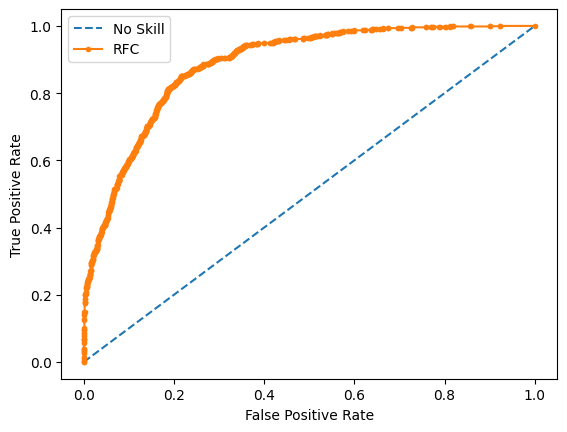

In [112]:
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = y_pred_rfc_proba[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
rfc_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('RFC: ROC AUC=%.3f' % (rfc_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='RFC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [114]:
# from sklearn.model_selection import GridSearchCV
# parameters = {'max_depth':[2,3,4,5,6,7,8], 'min_samples_split':[2,3,4,5,6,7], 'min_samples_leaf':[2,3,4,5,6,7]}
# # parameters = {"n_estimators":[10,20,30,50,70,100,200,300,450,500,700]}
# rfc=RandomForestClassifier(random_state=42,n_estimators=500)
# clf = GridSearchCV(rfc, parameters)
# clf.fit(x_train, y_train)

In [115]:
# clf.best_score_

In [116]:
# clf.best_params_

# XG Boost Classifier

In [117]:
xgb1 = XGBClassifier(n_estimators=500) 

In [118]:
xgb1.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [119]:
y_pred_xgb=xgb1.predict(x_test)

In [120]:
acc_xgb = accuracy_score(y_pred_xgb,y_test)
f1_xgb = f1_score(y_pred_xgb,y_test)
aucScore_xgb = roc_auc_score(y_pred_xgb,y_test)

print("Accuracy :" + str(acc_xgb))
print("F1 Score :" + str(f1_xgb))
print("Area Under Curve :" + str(aucScore_xgb))
print(classification_report(y_pred_xgb,y_test))

Accuracy :0.8100558659217877
F1 Score :0.7679180887372014
Area Under Curve :0.8075721560410262
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1733
           1       0.74      0.80      0.77      1131

    accuracy                           0.81      2864
   macro avg       0.80      0.81      0.80      2864
weighted avg       0.81      0.81      0.81      2864



# Light GBM

In [121]:
lgbm = LGBMClassifier(n_estimators=450)

In [122]:
lgbm.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 2831, number of negative: 3851
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.722603 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1142400
[LightGBM] [Info] Number of data points in the train set: 6682, number of used features: 4480
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.423676 -> initscore=-0.307703
[LightGBM] [Info] Start training from score -0.307703


LGBMClassifier(n_estimators=450)

In [123]:
y_pred_lgbm=lgbm.predict(x_test)

In [147]:
y_pred_lgbm

array([0., 0., 1., ..., 0., 0., 0.])

In [124]:
acc_lgbm = accuracy_score(y_pred_lgbm,y_test)
f1_lgbm = f1_score(y_pred_lgbm,y_test)
aucScore_lgbm = roc_auc_score(y_pred_lgbm,y_test)

print("Accuracy :" + str(acc_lgbm))
print("F1 Score :" + str(f1_lgbm))
print("Area Under Curve :" + str(aucScore_lgbm))
print(classification_report(y_pred_lgbm,y_test))

Accuracy :0.8341480446927374
F1 Score :0.7981300467488313
Area Under Curve :0.8323757479545733
              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86      1724
         1.0       0.77      0.82      0.80      1140

    accuracy                           0.83      2864
   macro avg       0.83      0.83      0.83      2864
weighted avg       0.84      0.83      0.83      2864



# Logistic Regression

In [125]:
lgr = LogisticRegression(random_state=42)

In [126]:
lgr.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [127]:
y_pred_lgr=lgr.predict(x_test)

In [146]:
y_pred_lgr

array([0., 1., 1., ..., 0., 0., 1.])

In [128]:
acc_lgr = accuracy_score(y_pred_lgr,y_test)
f1_lgr = f1_score(y_pred_lgr,y_test)
aucScore_lgr = roc_auc_score(y_pred_lgr,y_test)

print("Accuracy :" + str(acc_lgr))
print("F1 Score :" + str(f1_lgr))
print("Area Under Curve :" + str(aucScore_lgr))
print(classification_report(y_pred_lgr,y_test))

Accuracy :0.7060055865921788
F1 Score :0.647108130762783
Area Under Curve :0.6986745434810337
              precision    recall  f1-score   support

         0.0       0.76      0.74      0.75      1691
         1.0       0.64      0.66      0.65      1173

    accuracy                           0.71      2864
   macro avg       0.70      0.70      0.70      2864
weighted avg       0.71      0.71      0.71      2864



# SVM

In [130]:
svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))

In [131]:
svm.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [132]:
y_pred_svm=svm.predict(x_test)

In [145]:
y_pred_svm

array([0., 1., 1., ..., 0., 0., 0.])

In [133]:
acc_svm = accuracy_score(y_pred_svm,y_test)
f1_svm = f1_score(y_pred_svm,y_test)
aucScore_svm = roc_auc_score(y_pred_svm,y_test)

print("Accuracy :" + str(acc_svm))
print("F1 Score :" + str(f1_svm))
print("Area Under Curve :" + str(aucScore_svm))
print(classification_report(y_pred_svm,y_test))

Accuracy :0.7754888268156425
F1 Score :0.7239158437097467
Area Under Curve :0.7718529317684111
              precision    recall  f1-score   support

         0.0       0.83      0.79      0.81      1748
         1.0       0.69      0.76      0.72      1116

    accuracy                           0.78      2864
   macro avg       0.76      0.77      0.77      2864
weighted avg       0.78      0.78      0.78      2864



# Comparitive Analysis

Text(0.5, 1.0, 'Comparing Accuracies')

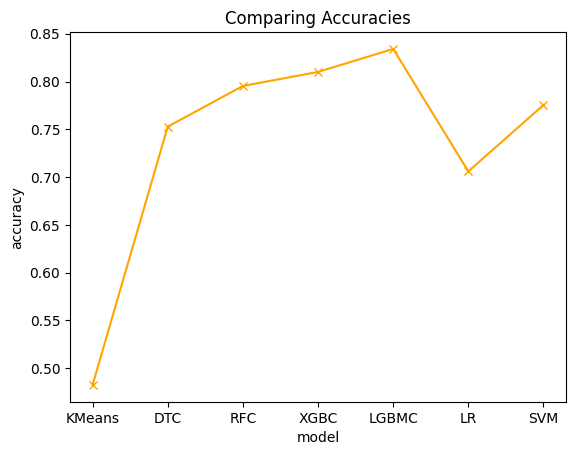

In [134]:
plt.plot(['KMeans','DTC','RFC','XGBC','LGBMC','LR','SVM'],[acc_kmeans,acc_dtc,acc_rfc,acc_xgb,acc_lgbm,acc_lgr,acc_svm],marker='x',color='orange')
plt.xlabel('model')
plt.ylabel('accuracy')
plt.title('Comparing Accuracies')

Text(0.5, 1.0, 'Comparing F1 Scores')

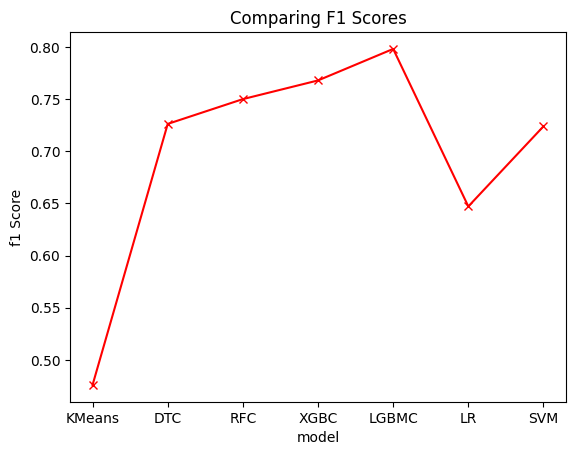

In [135]:
plt.plot(['KMeans','DTC','RFC','XGBC','LGBMC','LR','SVM'],[f1_kmeans,f1_dtc,f1_rfc,f1_xgb,f1_lgbm,f1_lgr,f1_svm],marker='x',color='red')
plt.xlabel('model')
plt.ylabel('f1 Score')
plt.title('Comparing F1 Scores')

Text(0.5, 1.0, 'Comparing AUC')

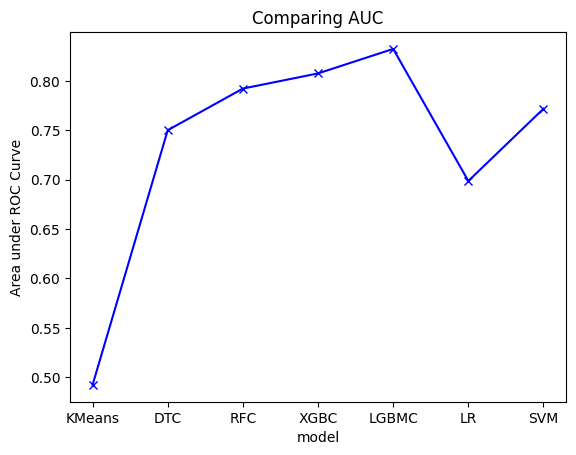

In [136]:
plt.plot(['KMeans','DTC','RFC','XGBC','LGBMC','LR','SVM'],[aucScore_kmeans,aucScore_dtc,aucScore_rfc,aucScore_xgb,aucScore_lgbm,aucScore_lgr,aucScore_svm],marker='x',color='blue')
plt.xlabel('model')
plt.ylabel('Area under ROC Curve')
plt.title('Comparing AUC')